In [6]:
# Data processing and visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)


In [18]:
# Load the dataset 
df = pd.read_csv("crime_incidents_2023.csv")

# Preview shape and first few rows
print(" Dataset Shape:", df.shape)
df.head()


 Dataset Shape: (184078, 17)


C:\Users\gaura\AppData\Local\Temp\ipykernel_568\3203467809.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("crime_incidents_2023.csv")


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,232007173,3115,NaN,INVESTIGATE PERSON,B3,,0,2023-01-27 22:44:00+00,2023,1,Friday,22,NaN,FAVRE ST,42.271661,-71.099535,"(42.271661031027065, -71.09953455161765)"
1,232004454,3301,NaN,VERBAL DISPUTE,B2,316,0,2023-01-17 20:21:00+00,2023,1,Tuesday,20,NaN,HAROLD ST,42.312596,-71.092876,"(42.3125962960786, -71.09287583752645)"
2,232006290,3115,NaN,INVESTIGATE PERSON,A1,,0,2023-01-24 00:00:00+00,2023,1,Tuesday,0,NaN,HANOVER ST,42.365699,-71.052892,"(42.3656993584582, -71.05289203191269)"
3,232024939,3114,NaN,INVESTIGATE PROPERTY,B3,,0,2023-03-31 17:14:00+00,2023,3,Friday,17,NaN,BLUE HILL AVE,42.292788,-71.088520,"(42.29278799134922, -71.08851953962399)"
4,232006708,423,NaN,ASSAULT - AGGRAVATED,B2,,0,2023-01-26 09:00:00+00,2023,1,Thursday,9,NaN,HUTCHINGS ST,42.310269,-71.089311,"(42.310268910354935, -71.08931055058088)"


In [68]:
# Column names
print(" Column Names:\n", df.columns.tolist())

# Data types and memory usage
print("\n Dataset Info:")
df.info()


 Column Names:
 ['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location', 'Hour', 'DayOfWeek']

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184078 entries, 0 to 184077
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   INCIDENT_NUMBER      184078 non-null  object             
 1   OFFENSE_CODE         184078 non-null  int64              
 2   OFFENSE_CODE_GROUP   0 non-null       float64            
 3   OFFENSE_DESCRIPTION  184078 non-null  object             
 4   DISTRICT             183672 non-null  object             
 5   REPORTING_AREA       153681 non-null  object             
 6   SHOOTING             184078 non-null  int64              
 7   OCCURRED_ON_DATE     184078 non-

In [14]:
# Count missing values per column
missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]  # Show only columns with missing values

print("\n Missing Values Detected:\n")
print(missing)
# Top 10 crime types
print("\n Top 10 Most Common Crimes:")
print(df['OFFENSE_DESCRIPTION'].value_counts().head(10))

# Number of unique districts
print("\n Districts Available:", df['DISTRICT'].unique())

# Number of unique streets
print("\n Total Unique Streets:", df['STREET'].nunique())



 Missing Values Detected:

OFFENSE_CODE_GROUP    184078
UCR_PART              184078
REPORTING_AREA         30397
Location               11411
Long                   11411
Lat                    11411
DISTRICT                 406
dtype: int64

 Top 10 Most Common Crimes:
OFFENSE_DESCRIPTION
INVESTIGATE PERSON                              17741
SICK ASSIST                                     16075
M/V - LEAVING SCENE - PROPERTY DAMAGE           10935
INVESTIGATE PROPERTY                             8218
LARCENY SHOPLIFTING                              8098
TOWED MOTOR VEHICLE                              7975
ASSAULT - SIMPLE                                 7513
VANDALISM                                        6614
PROPERTY - LOST/ MISSING                         6169
DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE     4678
Name: count, dtype: int64

 Districts Available: ['B3' 'B2' 'A1' 'E5' 'D14' 'C6' 'D4' 'E18' 'C11' 'E13' 'A7' 'A15'
 'External' nan 'Outside of']

 Total Unique Streets

In [16]:
# Preview date values
print("\n Date column sample:")
print(df['OCCURRED_ON_DATE'].head())

# Convert OCCURRED_ON_DATE to datetime 
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'], errors='coerce')

# Extract useful time-based features
df['Hour'] = df['OCCURRED_ON_DATE'].dt.hour
df['DayOfWeek'] = df['OCCURRED_ON_DATE'].dt.day_name()
df['Month'] = df['OCCURRED_ON_DATE'].dt.month_name()



 Date column sample:
0    2023-01-27 22:44:00+00
1    2023-01-17 20:21:00+00
2    2023-01-24 00:00:00+00
3    2023-03-31 17:14:00+00
4    2023-01-26 09:00:00+00
Name: OCCURRED_ON_DATE, dtype: object


In [24]:
# Convert the datetime column (make sure this column name matches your dataset)
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'], errors='coerce')

# Now create 'Hour' column from the datetime
df['Hour'] = df['OCCURRED_ON_DATE'].dt.hour


C:\Users\gaura\AppData\Local\Temp\ipykernel_568\1607974841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour', palette='Blues')


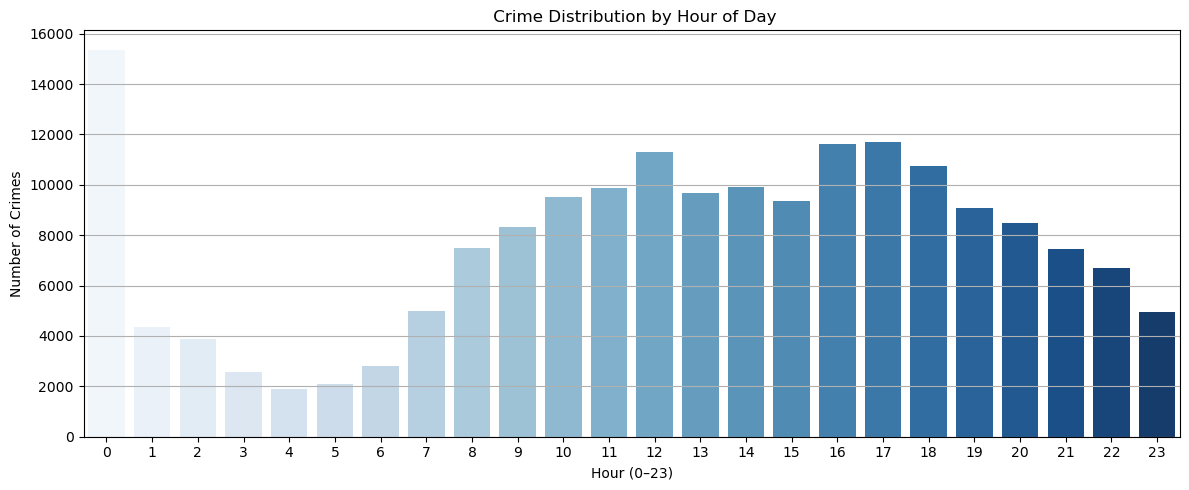

In [64]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Hour', palette='Blues')
plt.title(' Crime Distribution by Hour of Day')
plt.xlabel('Hour (0–23)')
plt.ylabel('Number of Crimes')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [38]:
df['DayOfWeek'] = df['OCCURRED_ON_DATE'].dt.day_name()


C:\Users\gaura\AppData\Local\Temp\ipykernel_568\3954360911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='DayOfWeek', order=order, palette='Set2')


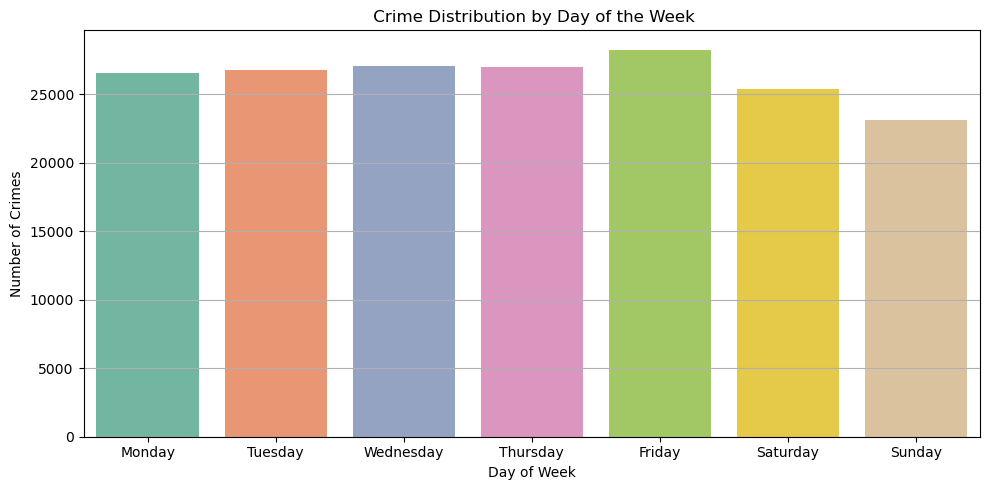

In [66]:
plt.figure(figsize=(10, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x='DayOfWeek', order=order, palette='Set2')
plt.title(' Crime Distribution by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\gaura\AppData\Local\Temp\ipykernel_568\1072488753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='OrRd')


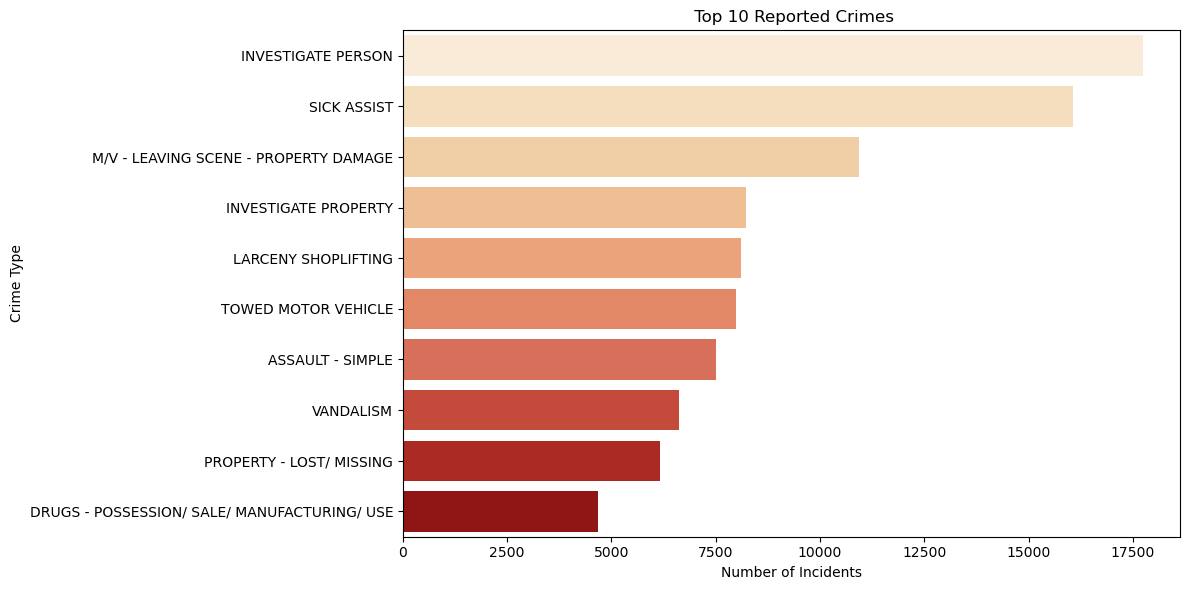

In [62]:
plt.figure(figsize=(12, 6))
top_crimes = df['OFFENSE_DESCRIPTION'].value_counts().head(10)
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='OrRd')
plt.title(' Top 10 Reported Crimes')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.tight_layout()
plt.show()


C:\Users\gaura\AppData\Local\Temp\ipykernel_568\2184022162.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='DISTRICT', order=df['DISTRICT'].value_counts().index, palette='coolwarm')


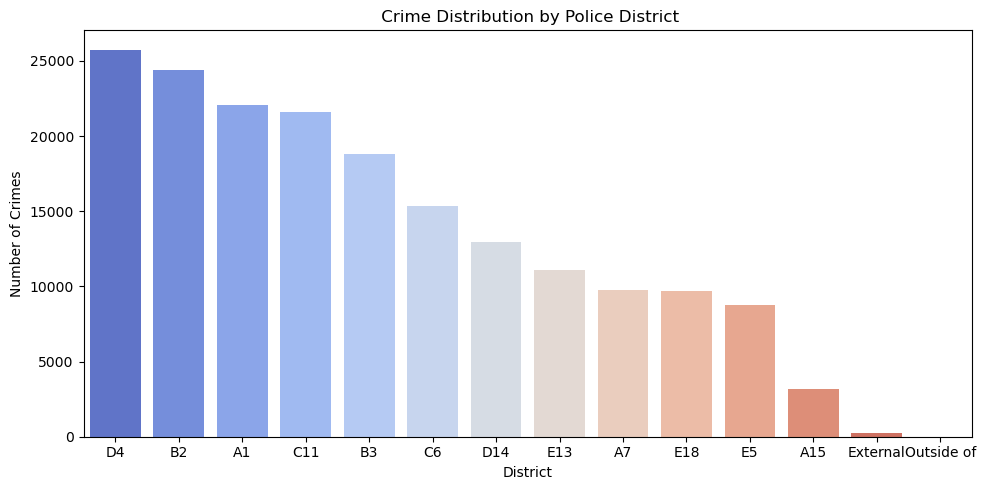

In [60]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='DISTRICT', order=df['DISTRICT'].value_counts().index, palette='coolwarm')
plt.title(' Crime Distribution by Police District')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()


In [46]:
# Step 1: Focus on top 5 crime types
top_crimes = df['OFFENSE_DESCRIPTION'].value_counts().nlargest(5).index
df_top = df[df['OFFENSE_DESCRIPTION'].isin(top_crimes)].copy()

# Step 2: Confirm balance
print(df_top['OFFENSE_DESCRIPTION'].value_counts())


OFFENSE_DESCRIPTION
INVESTIGATE PERSON                       17741
SICK ASSIST                              16075
M/V - LEAVING SCENE - PROPERTY DAMAGE    10935
INVESTIGATE PROPERTY                      8218
LARCENY SHOPLIFTING                       8098
Name: count, dtype: int64


In [48]:
# Step 1: Select features
features = ['Hour', 'DayOfWeek', 'DISTRICT']
target = 'OFFENSE_DESCRIPTION'

# Step 2: One-hot encode categorical features
df_encoded = pd.get_dummies(df_top[features], drop_first=True)

# Step 3: Encode target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df_top[target])

# Step 4: Feature matrix
X = df_encoded


In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(" Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


 Classification Report:
                                       precision    recall  f1-score   support

                   INVESTIGATE PERSON       0.31      0.45      0.37      3548
                 INVESTIGATE PROPERTY       0.26      0.11      0.16      1644
                  LARCENY SHOPLIFTING       0.36      0.41      0.39      1620
M/V - LEAVING SCENE - PROPERTY DAMAGE       0.25      0.15      0.19      2187
                          SICK ASSIST       0.32      0.32      0.32      3215

                             accuracy                           0.31     12214
                            macro avg       0.30      0.29      0.28     12214
                         weighted avg       0.30      0.31      0.30     12214



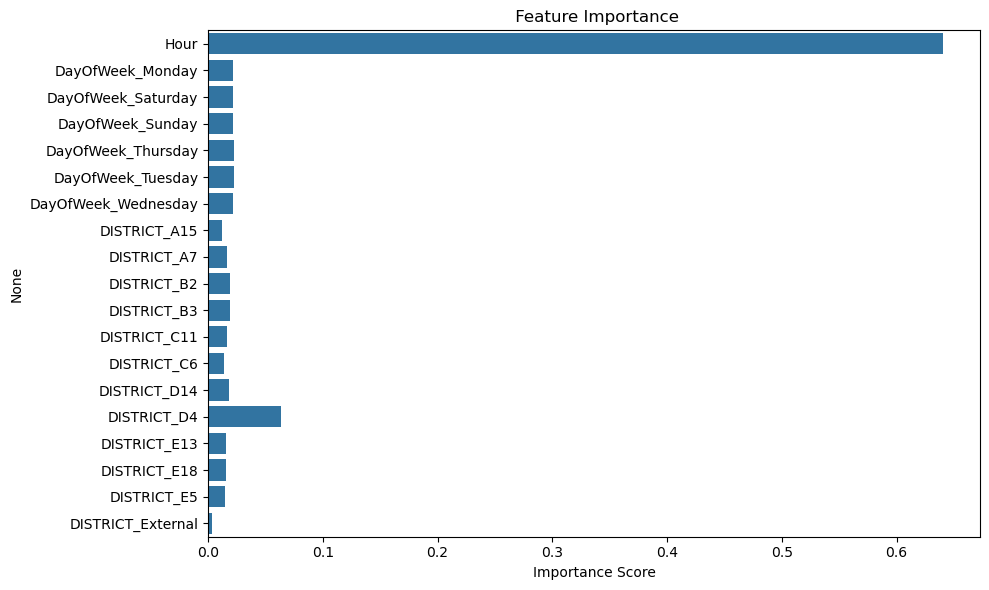

In [56]:
# Plot feature importances
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title(" Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [72]:
# Recommended columns for Tableau dashboard
print(df.columns.tolist())


['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location', 'Hour', 'DayOfWeek']


In [74]:
df.to_csv("crime_dashboard_ready.csv", index=False)
